# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

<img src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2016/03/giphy-4.gif" width="700px">

**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Execute this line with the Functions 
import sys
sys.path.insert(0, '/Users/dee/Desktop/DA_Oct24/_DA_course/_functions_')

from Functions_EDA_Updated import *

In [4]:
path_to_file = '/Users/dee/Workspace/World Happiness Project/Happiness_Score_Data.csv'

df = pd.read_csv(path_to_file)
df

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,151,152,Rwanda,3.334,0.359,0.711,NaN,0.555,0.217,0.411,2019
308,308,152,153,Tanzania,3.231,0.476,0.885,NaN,0.417,0.276,0.147,2019
309,309,153,154,Afghanistan,3.203,0.350,0.517,NaN,0.000,0.158,0.025,2019
310,310,154,155,Central African Republic,3.083,0.026,0.000,NaN,0.225,0.235,0.035,2019


### Exercise 1.Tell a story with your dataset, to try to answer the following question:

>"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

To achieve this goal, use the different funcionalities from the visualization libraries that you have seen in the module.

<h1>First, let's check the data</h1> 

In [371]:
## Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [372]:
## We have 12 columns and 312 rows
df.shape

(312, 12)

In [373]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,7.000000,312.000000,312.000000,311.000000,312.000000
mean,155.500000,77.500000,78.500000,5.391506,0.898298,1.211026,0.038571,0.423538,0.182926,0.111299,2018.500000
std,90.210864,45.104737,45.104737,1.114631,0.394592,0.300310,0.035213,0.156024,0.096739,0.095365,0.500803
min,0.000000,0.000000,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,77.750000,38.750000,39.750000,4.514250,0.609500,1.055750,0.005000,0.322500,0.108750,0.050000,2018.000000
50%,155.500000,77.500000,78.500000,5.379500,0.960000,1.265500,0.048000,0.449500,0.175500,0.082000,2018.500000
75%,233.250000,116.250000,117.250000,6.176000,1.219500,1.457500,0.066000,0.540250,0.245000,0.140500,2019.000000
max,311.000000,155.000000,156.000000,7.769000,2.096000,1.644000,0.080000,0.724000,0.598000,0.457000,2019.000000


In [374]:
## Checking for null values 
df.isnull().sum() 

Unnamed: 0.1                      0
Unnamed: 0                        0
Overall rank                      0
Country or region                 0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy         305
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         1
year                              0
dtype: int64

In [375]:
## Check amount of duplicated countries
df['Country or region'].duplicated().value_counts()

Country or region
False    160
True     152
Name: count, dtype: int64

In [376]:
## Check year data
df.year.unique()

array([2018, 2019])

In [377]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [13]:
df.tail(5)

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
307,307,151,152,Rwanda,3.334,0.359,0.711,NaN,0.555,0.217,0.411,2019
308,308,152,153,Tanzania,3.231,0.476,0.885,NaN,0.417,0.276,0.147,2019
309,309,153,154,Afghanistan,3.203,0.350,0.517,NaN,0.000,0.158,0.025,2019
310,310,154,155,Central African Republic,3.083,0.026,0.000,NaN,0.225,0.235,0.035,2019
311,311,155,156,South Sudan,2.853,0.306,0.575,NaN,0.010,0.202,0.091,2019


In [378]:
## Drop Unnamed:0.1, Unnamed:0, Healthy life expectancy columns because they are not contributing anything to the data 

df.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'Healthy life expectancy'], inplace=True)


In [229]:
## Duplicate the dataframe to still be able to retrieve the original data, if needed

df_copy = df.copy()
df_copy

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,0.555,0.217,0.411,2019
308,153,Tanzania,3.231,0.476,0.885,0.417,0.276,0.147,2019
309,154,Afghanistan,3.203,0.350,0.517,0.000,0.158,0.025,2019
310,155,Central African Republic,3.083,0.026,0.000,0.225,0.235,0.035,2019


In [230]:
## Rename column names to remove the spaces in between the strings, so it can be easily accessed 

df_copy.rename(columns={'Overall rank': 'overall_rank',
                        'Country or region': 'country_region', 
                        'Score': 'score',
                        'GDP per capita': 'gdp_per_capita', 
                        'Social support': 'social_support',
                        'Freedom to make life choices': 'freedom',
                        'Generosity': 'generosity',
                        'Perceptions of corruption': 'corruption_perception'
                        }, inplace=True)

In [232]:

## Creating new dataframe for each year

df_2018 = df_copy[df_copy.year == 2018]
df_2019 = df_copy[df_copy.year == 2019]

In [233]:
## Fill the only missing data in UAE in corruption_perception column

fill_na(df_2018)

Number of missing values on your dataset are

overall_rank             0
country_region           0
score                    0
gdp_per_capita           0
social_support           0
freedom                  0
generosity               0
corruption_perception    0
year                     0
dtype: int64


,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.305,0.218,0.038,2018


<h2> 1. Which countries are happiest in 2018 and 2019? </>

In [234]:
## Get top 10 from 2018 

top_2018 = df_2018.head(10)
top_2018

,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
5,6,Netherlands,7.441,1.361,1.488,0.638,0.333,0.295,2018
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018
8,9,Sweden,7.314,1.355,1.501,0.659,0.285,0.383,2018
9,10,Australia,7.272,1.340,1.573,0.647,0.361,0.302,2018


In [235]:
## Get top 10 from 2019

top_2019 = df_2019.head(10)
top_2019

,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
156,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019
157,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019
158,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019
159,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019
160,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019
161,6,Switzerland,7.480,1.452,1.526,0.572,0.263,0.343,2019
162,7,Sweden,7.343,1.387,1.487,0.574,0.267,0.373,2019
163,8,New Zealand,7.307,1.303,1.557,0.585,0.330,0.380,2019
164,9,Canada,7.278,1.365,1.505,0.584,0.285,0.308,2019
165,10,Austria,7.246,1.376,1.475,0.532,0.244,0.226,2019


In [236]:
df_2019.head(20)


,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
156,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019
157,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019
158,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019
159,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019
160,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019
161,6,Switzerland,7.480,1.452,1.526,0.572,0.263,0.343,2019
162,7,Sweden,7.343,1.387,1.487,0.574,0.267,0.373,2019
163,8,New Zealand,7.307,1.303,1.557,0.585,0.330,0.380,2019
164,9,Canada,7.278,1.365,1.505,0.584,0.285,0.308,2019
165,10,Austria,7.246,1.376,1.475,0.532,0.244,0.226,2019


In [237]:
df_2018.head(20)

,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
5,6,Netherlands,7.441,1.361,1.488,0.638,0.333,0.295,2018
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018
8,9,Sweden,7.314,1.355,1.501,0.659,0.285,0.383,2018
9,10,Australia,7.272,1.340,1.573,0.647,0.361,0.302,2018


Created new dataframe for each year. Then, I can extract and compare the scores per year. I can also do a groupby but separating might be easier. 

In [ ]:
## Concat top 20 for both years 
df_combined = pd.concat([top_2018, top_2019])
df_combined


,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
5,6,Netherlands,7.441,1.361,1.488,0.638,0.333,0.295,2018
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018
8,9,Sweden,7.314,1.355,1.501,0.659,0.285,0.383,2018
9,10,Australia,7.272,1.340,1.573,0.647,0.361,0.302,2018


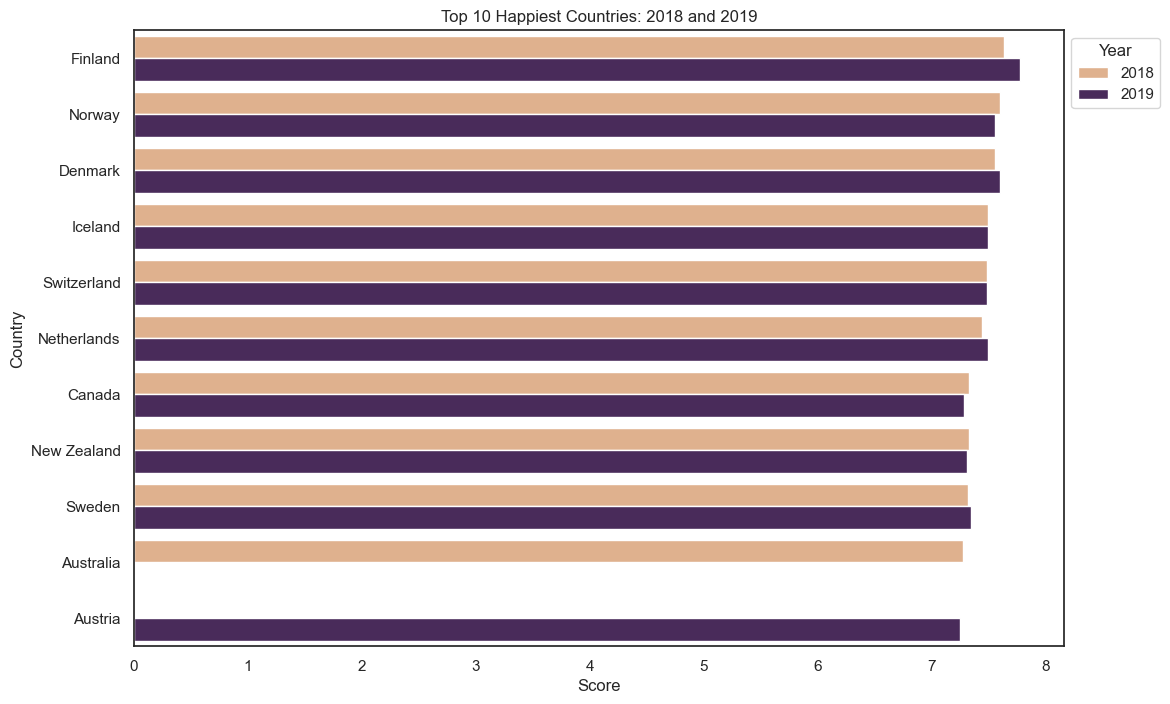

In [160]:
## Create bar plot. The top 20 countries for 2018 and 2019. 

plt.figure(figsize=(12, 8))

sns.barplot(data=df_combined, x='score',
            y='country_region',
            hue='year', palette='flare')

## Add annotations in the barplot


## Add labels

plt.title("Top 10 Happiest Countries: 2018 and 2019")
plt.xlabel('Score')
plt.ylabel('Country')

#plt.xticks(rotation=100)
plt.legend(title='Year',bbox_to_anchor=(1, 1))

plt.show()

<h2> 2. Which countries are the least happiest in 2018 and 2019? </h3>

In [139]:
least_2018 = df_2018.tail(10).sort_values(by='overall_rank', ascending=False)
least_2018

,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
155,156,Burundi,2.905,0.091,0.627,0.065,0.149,0.076,2018
154,155,Central African Republic,3.083,0.024,0.000,0.305,0.218,0.038,2018
153,154,South Sudan,3.254,0.337,0.608,0.112,0.224,0.106,2018
152,153,Tanzania,3.303,0.455,0.991,0.481,0.270,0.097,2018
151,152,Yemen,3.355,0.442,1.073,0.244,0.083,0.064,2018
150,151,Rwanda,3.408,0.332,0.896,0.636,0.200,0.444,2018
149,150,Syria,3.462,0.689,0.382,0.088,0.376,0.144,2018
148,149,Liberia,3.495,0.076,0.858,0.419,0.206,0.030,2018
147,148,Haiti,3.582,0.315,0.714,0.025,0.392,0.104,2018
146,147,Malawi,3.587,0.186,0.541,0.531,0.210,0.080,2018


In [140]:
least_2019 = df_2019.tail(10).sort_values(by='overall_rank', ascending=False)
least_2019

,overall_rank,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
country_region,,,,,,,,
South Sudan,156,2.853,0.306,0.575,0.010,0.202,0.091,2019
Central African Republic,155,3.083,0.026,0.000,0.225,0.235,0.035,2019
Afghanistan,154,3.203,0.350,0.517,0.000,0.158,0.025,2019
Tanzania,153,3.231,0.476,0.885,0.417,0.276,0.147,2019
Rwanda,152,3.334,0.359,0.711,0.555,0.217,0.411,2019
Yemen,151,3.380,0.287,1.163,0.143,0.108,0.077,2019
Malawi,150,3.410,0.191,0.560,0.443,0.218,0.089,2019
Syria,149,3.462,0.619,0.378,0.013,0.331,0.141,2019
Botswana,148,3.488,1.041,1.145,0.455,0.025,0.100,2019


In [ ]:
## Concat both years
df_combined_least = pd.concat([least_2018, least_2019])

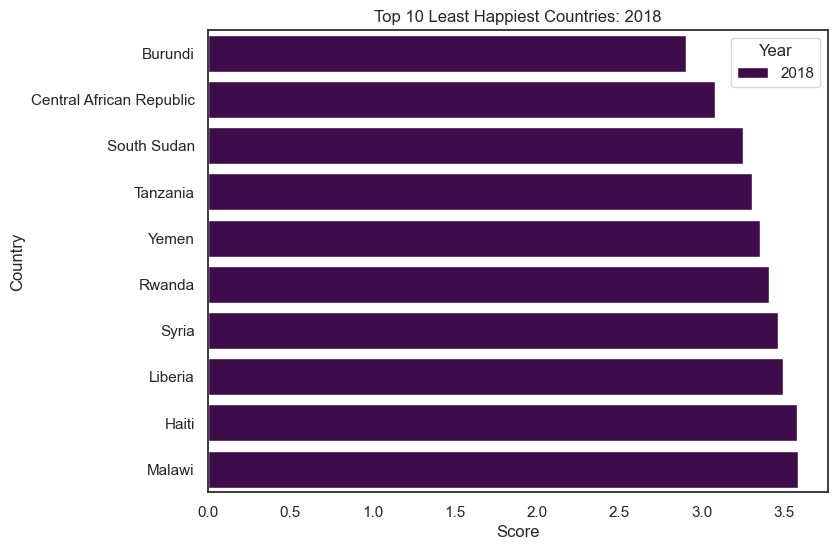

In [ ]:
## Create bar plot. The least happiest 20 countries for 2018 and 2019

plt.figure(figsize=(8, 6))

sns.barplot(data=least_2018, x='score',
            y='country_region',
            hue='year', palette='viridis')

## Add annotations in the barplot


## Add labels

plt.title("Top 10 Least Happiest Countries: 2018")
plt.xlabel('Score')
plt.ylabel('Country')

#plt.xticks(rotation=100)
plt.legend(title='Year',bbox_to_anchor=(1, 1))

plt.show()

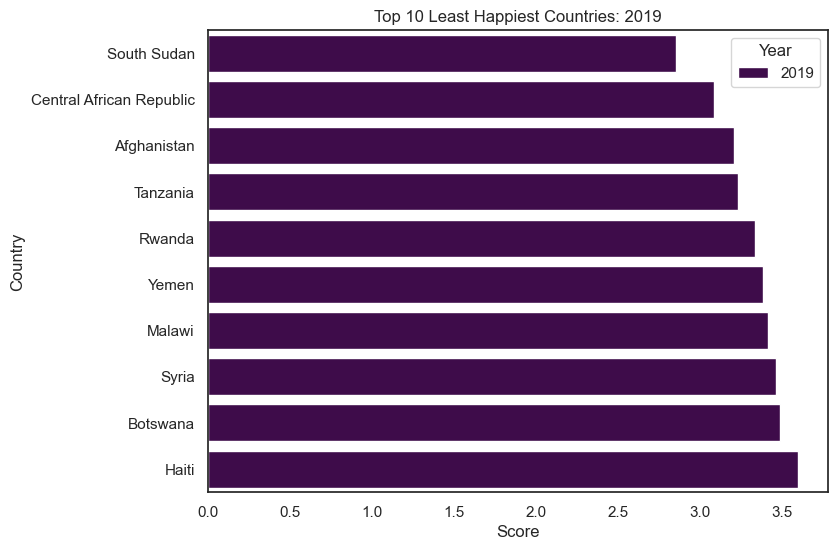

In [146]:
## Create bar plot. The top 20 countries for 2018 and 2019. 

plt.figure(figsize=(8, 6))

sns.barplot(data=least_2019, x='score',
            y='country_region',
            hue='year', palette='viridis')

## Add annotations in the barplot


## Add labels

plt.title("Top 10 Least Happiest Countries: 2019")
plt.xlabel('Score')
plt.ylabel('Country')

#plt.xticks(rotation=100)
plt.legend(title='Year',bbox_to_anchor=(1, 1))

plt.show()

<h2>How much did the scores change? Which countries went up or down in the ranks?</> 


In [379]:
## Trying a pivot table
pivot_countries = df_copy.pivot_table(index='country_region', values=['overall_rank', 'score', 'gdp_per_capita', 'social_support', 'freedom', 'corruption_perception'], columns='year').head(20)
pivot_countries


corruption_perception        freedom         \
year                                    2018   2019    2018   2019   
country_region                                                       
Afghanistan                            0.036  0.025   0.085  0.000   
Albania                                0.032  0.027   0.419  0.383   
Algeria                                0.135  0.114   0.077  0.086   
Angola                                 0.061    NaN   0.000    NaN   
Argentina                              0.054  0.050   0.570  0.471   
Armenia                                0.028  0.064   0.260  0.283   
Australia                              0.302  0.290   0.647  0.557   
Austria                                0.224  0.226   0.617  0.532   
Azerbaijan                             0.176  0.182   0.430  0.351   
Bahrain                                0.123  0.110   0.594  0.536   
Bangladesh                             0.144  0.143   0.580  0.527   
Belarus                                0.154  0.142   0.307  0.235   
Belgium                                0.240  0.210   0.583  0.473   
Belize                                 0.089    NaN   0.593    NaN   
Benin                                  0.067  0.082   0.440  0.349   
Bhutan                                 0.171  0.167   0.541  0.457   
Bolivia                                0.054  0.064   0.606  0.511   
Bosnia and Herzegovina                 0.000  0.006   0.280  0.212   
Botswana                               0.092  0.100   0.557  0.455   
Brazil                                 0.088  0.086   0.493  0.390   

                       gdp_per_capita        overall_rank         score  \
year                             2018   2019         2018   2019   2018   
country_region                                                            
Afghanistan                     0.332  0.350        145.0  154.0  3.632   
Albania                         0.916  0.947        112.0  107.0  4.586   
Algeria                         0.979  1.002         84.0   88.0  5.295   
Angola                          0.730    NaN        142.0    NaN  3.795   
Argentina                       1.073  1.092         29.0   47.0  6.388   
Armenia                         0.816  0.850        129.0  116.0  4.321   
Australia                       1.340  1.372         10.0   11.0  7.272   
Austria                         1.341  1.376         12.0   10.0  7.139   
Azerbaijan                      1.024  1.043         87.0   90.0  5.201   
Bahrain                         1.338  1.362         43.0   37.0  6.105   
Bangladesh                      0.532  0.562        115.0  125.0  4.500   
Belarus                         1.039  1.067         73.0   81.0  5.483   
Belgium                         1.324  1.356         16.0   18.0  6.927   
Belize                          0.807    NaN         49.0    NaN  5.956   
Benin                           0.378  0.393        136.0  102.0  4.141   
Bhutan                          0.796  0.813         97.0   95.0  5.082   
Bolivia                         0.751  0.776         62.0   61.0  5.752   
Bosnia and Herzegovina          0.915  0.945         93.0   78.0  5.129   
Botswana                        1.017  1.041        146.0  148.0  3.590   
Brazil                          0.986  1.004         28.0   32.0  6.419   

                              social_support         
year                     2019           2018   2019  
country_region                                       
Afghanistan             3.203          0.537  0.517  
Albania                 4.719          0.817  0.848  
Algeria                 5.211          1.154  1.160  
Angola                    NaN          1.125    NaN  
Argentina               6.086          1.468  1.432  
Armenia                 4.559          0.990  1.055  
Australia               7.228          1.573  1.548  
Austria                 7.246          1.504  1.475  
Azerbaijan              5.208          1.161  1.147  
Bahrain                 6.199         

Pivot tables can't calculate the difference for each year (or I don't know how). Calculating them each separately and combining in one table.

In [ ]:
## Getting score change
# country, score_2018, score_2019, difference 

#Pivot the DataFrame to make each year a column
df_scorep = df_copy.pivot(index=['country_region'], columns='year', values='score').reset_index()

# Rename the columns for clarity
df_scorep.columns = ['country', 'score_2018', 'score_2019']

# Calculate the rank change between 2019 and 2018
df_scorep['score_change'] = df_scorep['score_2018'] - df_scorep['score_2019']


df_scorep

,country,score_2018,score_2019,score_change
0,Afghanistan,3.632,3.203,0.429
1,Albania,4.586,4.719,-0.133
2,Algeria,5.295,5.211,0.084
3,Angola,3.795,NaN,NaN
4,Argentina,6.388,6.086,0.302
...,...,...,...,...
155,Venezuela,4.806,4.707,0.099
156,Vietnam,5.103,5.175,-0.072
157,Yemen,3.355,3.380,-0.025
158,Zambia,4.377,4.107,0.270


In [287]:
## Getting GDP change
# country, gdp_2018, gdp_2019, difference 

#Pivot the DataFrame to make each year a column
df_gdp = df_copy.pivot(index=['country_region'], columns='year', values='gdp_per_capita').reset_index()

# Rename the columns for clarity
df_gdp.columns = ['country', 'gdp_2018', 'gdp_2019']

# Calculate the rank change between 2019 and 2018
df_gdp['gdp_change'] = df_gdp['gdp_2018'] - df_gdp['gdp_2019']


df_gdp

,country,gdp_2018,gdp_2019,gdp_change
0,Afghanistan,0.332,0.350,-0.018
1,Albania,0.916,0.947,-0.031
2,Algeria,0.979,1.002,-0.023
3,Angola,0.730,NaN,NaN
4,Argentina,1.073,1.092,-0.019
...,...,...,...,...
155,Venezuela,0.996,0.960,0.036
156,Vietnam,0.715,0.741,-0.026
157,Yemen,0.442,0.287,0.155
158,Zambia,0.562,0.578,-0.016


In [339]:
## Getting social support change
# country, social_2018, social_2019, difference 

#Pivot the DataFrame to make each year a column
df_social = df_copy.pivot(index=['country_region'], columns='year', values='social_support').reset_index()

# Rename the columns for clarity
df_social.columns = ['country', 'social_2018', 'social_2019']

# Calculate the rank change between 2019 and 2018
df_social['social_change'] = df_social['social_2018'] - df_social['social_2019']


df_social

,country,social_2018,social_2019,social_change
0,Afghanistan,0.537,0.517,0.020
1,Albania,0.817,0.848,-0.031
2,Algeria,1.154,1.160,-0.006
3,Angola,1.125,NaN,NaN
4,Argentina,1.468,1.432,0.036
...,...,...,...,...
155,Venezuela,1.469,1.427,0.042
156,Vietnam,1.365,1.346,0.019
157,Yemen,1.073,1.163,-0.090
158,Zambia,1.047,1.058,-0.011


In [297]:
## Getting corruption change
# country, corruption_2018, corruption_2019, difference 

#Pivot the DataFrame to make each year a column
df_corruption = df_copy.pivot(index=['country_region'], columns='year', values='corruption_perception').reset_index()

# Rename the columns for clarity
df_corruption.columns = ['country', 'corruption_2018', 'corruption_2019']

# Calculate the rank change between 2019 and 2018
df_corruption['corruption_change'] = df_corruption['corruption_2018'] - df_corruption['corruption_2019']

df_corruption

,country,corruption_2018,corruption_2019,corruption_change
0,Afghanistan,0.036,0.025,0.011
1,Albania,0.032,0.027,0.005
2,Algeria,0.135,0.114,0.021
3,Angola,0.061,NaN,NaN
4,Argentina,0.054,0.050,0.004
...,...,...,...,...
155,Venezuela,0.052,0.047,0.005
156,Vietnam,0.079,0.073,0.006
157,Yemen,0.064,0.077,-0.013
158,Zambia,0.082,0.087,-0.005


In [311]:
## Getting freedom change
# country, happiness_2018, happiness_2019, difference 

#Pivot the DataFrame to make each year a column
df_freedom = df_copy.pivot(index=['country_region'], columns='year', values='freedom').reset_index()

# Rename the columns for clarity
df_freedom.columns = ['country', 'freedom_2018', 'freedom_2019']

# Calculate the rank change between 2019 and 2018
df_freedom['freedom_change'] = df_freedom['freedom_2018'] - df_freedom['freedom_2019']


df_freedom

,country,freedom_2018,freedom_2019,freedom_change
0,Afghanistan,0.085,0.000,0.085
1,Albania,0.419,0.383,0.036
2,Algeria,0.077,0.086,-0.009
3,Angola,0.000,NaN,NaN
4,Argentina,0.570,0.471,0.099
...,...,...,...,...
155,Venezuela,0.133,0.154,-0.021
156,Vietnam,0.618,0.543,0.075
157,Yemen,0.244,0.143,0.101
158,Zambia,0.503,0.431,0.072


In [ ]:
## Getting ranking change 

#Pivot the DataFrame to make each year a column
df_pivot = df_copy.pivot(index='country_region', columns='year', values='overall_rank').reset_index()

# Rename the columns for clarity
df_pivot.columns = ['country', 'rank_2018', 'rank_2019']

# Calculate the rank change between 2018 and 2019
df_pivot['rank_change'] = df_pivot['rank_2018'] - df_pivot['rank_2019']


## Adding all change columns to this df

# Add score change column 2018 and 2019
df_pivot['score_change'] = df_scorep['score_change']

## Add GDP change column 2018 and 2019
df_pivot['gdp_change'] = df_gdp['gdp_change']

## Add GDP change column 2018 and 2019
df_pivot['corruption_change'] = df_corruption['corruption_change']

## Add freedom change column 2018 and 2019
df_pivot['freedom_change'] = df_freedom['freedom_change']

## Add social support change column 2018 and 2019
df_pivot['social_change'] = df_social['social_change']

df_pivot


,country,rank_2018,rank_2019,rank_change,score_change,gdp_change,corruption_change,freedom_change,social_change
0,Afghanistan,145.0,154.0,-9.0,0.429,-0.018,0.011,0.085,0.020
1,Albania,112.0,107.0,5.0,-0.133,-0.031,0.005,0.036,-0.031
2,Algeria,84.0,88.0,-4.0,0.084,-0.023,0.021,-0.009,-0.006
3,Angola,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,29.0,47.0,-18.0,0.302,-0.019,0.004,0.099,0.036
...,...,...,...,...,...,...,...,...,...
155,Venezuela,102.0,108.0,-6.0,0.099,0.036,0.005,-0.021,0.042
156,Vietnam,95.0,94.0,1.0,-0.072,-0.026,0.006,0.075,0.019
157,Yemen,152.0,151.0,1.0,-0.025,0.155,-0.013,0.101,-0.090
158,Zambia,125.0,138.0,-13.0,0.270,-0.016,-0.005,0.072,-0.011


In [341]:
## Countries that went down the rankings

lowest_rank_change = df_pivot.nsmallest(5, 'rank_change')
lowest_rank_change

,country,rank_2018,rank_2019,rank_change,score_change,gdp_change,corruption_change,freedom_change,social_change
87,Malaysia,35.0,80.0,-45.0,0.983,-0.060,0.035,-0.152,0.087
147,Turkmenistan,68.0,87.0,-19.0,0.389,-0.036,0.009,0.023,-0.005
4,Argentina,29.0,47.0,-18.0,0.302,-0.019,0.004,0.099,0.036
124,Sierra Leone,113.0,129.0,-16.0,0.197,-0.012,0.008,0.046,-0.028
41,Egypt,122.0,137.0,-15.0,0.253,-0.028,0.040,0.071,-0.014


In [342]:
df_pivot.loc[df_pivot['country'].isin(['Malaysia', 'Benin'])] 


,country,rank_2018,rank_2019,rank_change,score_change,gdp_change,corruption_change,freedom_change,social_change
14,Benin,136.0,102.0,34.0,-0.742,-0.015,-0.015,0.091,-0.065
87,Malaysia,35.0,80.0,-45.0,0.983,-0.060,0.035,-0.152,0.087


In [343]:
df_scorep.loc[df_scorep['country'].isin(['Malaysia', 'Benin'])] 

,country,score_2018,score_2019,score_change
14,Benin,4.141,4.883,-0.742
87,Malaysia,6.322,5.339,0.983


In [344]:
## Countries that went up the rankings

highest_rank_change = df_pivot.nlargest(5, 'rank_change')
highest_rank_change

,country,rank_2018,rank_2019,rank_change,score_change,gdp_change,corruption_change,freedom_change,social_change
14,Benin,136.0,102.0,34.0,-0.742,-0.015,-0.015,0.091,-0.065
54,Guinea,140.0,118.0,22.0,-0.570,-0.036,0.008,0.062,-0.037
73,Kosovo,66.0,46.0,20.0,-0.438,-0.027,0.017,-0.041,-0.002
104,Niger,134.0,114.0,20.0,-0.462,-0.007,-0.003,0.072,0.093
17,Bosnia and Herzegovina,93.0,78.0,15.0,-0.257,-0.030,-0.006,0.068,-0.134


<h2> Comparing Perceptions of Corruption </>

In [254]:
## Filtering the top 20 from df_2019

top_20_2019 = df_2019.iloc[:20,:]
top_20_2019

,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
156,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019
157,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019
158,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019
159,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019
160,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019
161,6,Switzerland,7.480,1.452,1.526,0.572,0.263,0.343,2019
162,7,Sweden,7.343,1.387,1.487,0.574,0.267,0.373,2019
163,8,New Zealand,7.307,1.303,1.557,0.585,0.330,0.380,2019
164,9,Canada,7.278,1.365,1.505,0.584,0.285,0.308,2019
165,10,Austria,7.246,1.376,1.475,0.532,0.244,0.226,2019


In [247]:
# Step 1: Create the traces of the plots
fig = px.scatter(top_20_2019, 
                 y="score", 
                 x="overall_rank",
                 color='country_region',
                 size='corruption_perception', # Set the size of the markers in the column income
                 size_max=50) # Specify the maximum size of the markers

# Step 2: Update the layout of the plot
fig.update_layout(title_text='2019: Top 20 Happiest Countries vs Perceptions of Corruption')

# Step 3: Update the axes styling
fig.update_yaxes(title= 'Score', 
                 ticklen= 5, # This parameter specifies the length of the ticks on the axis
                 zeroline= False) # This option disables the zero line on the axis
fig.update_xaxes(title= 'Overall Rank',
                 ticklen= 5, # This parameter specifies the length of the ticks on the axis
                 zeroline= False) # This option disables the zero line on the axis

# Step 4:Controling the visibility of the color scale associated with color axes
fig.update_layout(coloraxis_showscale=False)

# Step 5: Show the plot
fig.show()

# Step 6: Save the plot
#fig.write_html("file.html")

In [36]:
## Filtering the lowest 20 from df_2019

least_20_2019 = df_2019.iloc[136:,:].sort_values(by='score', ascending=False)
least_20_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 292 to 311
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   overall_rank           20 non-null     int64  
 1   country_region         20 non-null     object 
 2   score                  20 non-null     float64
 3   gdp_per_capita         20 non-null     float64
 4   social_support         20 non-null     float64
 5   freedom                20 non-null     float64
 6   generosity             20 non-null     float64
 7   corruption_perception  20 non-null     float64
 8   year                   20 non-null     int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ KB


In [37]:
# Step 1: Create the traces of the plots
fig = px.scatter(least_20_2019, 
                 y="score", 
                 x="overall_rank",
                 color='country_region',
                 size='corruption_perception', # Set the size of the markers in the column income
                 size_max=30) # Specify the maximum size of the markers

# Step 2: Update the layout of the plot
fig.update_layout(title_text='2019: Least Happiest Countries vs Perceptions of Corruption')

# Step 3: Update the axes styling
fig.update_yaxes(title= 'Score', 
                 ticklen= 5, # This parameter specifies the length of the ticks on the axis
                 zeroline= False) # This option disables the zero line on the axis
fig.update_xaxes(title= 'Overall Rank',
                 ticklen= 5, # This parameter specifies the length of the ticks on the axis
                 zeroline= False) # This option disables the zero line on the axis

# Step 4:Controling the visibility of the color scale associated with color axes
fig.update_layout(coloraxis_showscale=False)

# Step 5: Show the plot
fig.show()

In [333]:
# Step 1: Create the traces of the plots
fig = px.scatter(least_20_2019, 
                 y="score", 
                 x="overall_rank",
                 color='country_region',
                 size='freedom', # Set the size of the markers in the column income
                 size_max=30) # Specify the maximum size of the markers

# Step 2: Update the layout of the plot
fig.update_layout(title_text='2019: Happiness vs Freedom to make life choices')

# Step 3: Update the axes styling
fig.update_yaxes(title= 'Score', 
                 ticklen= 5, # This parameter specifies the length of the ticks on the axis
                 zeroline= False) # This option disables the zero line on the axis
fig.update_xaxes(title= 'Overall Rank',
                 ticklen= 5, # This parameter specifies the length of the ticks on the axis
                 zeroline= False) # This option disables the zero line on the axis

# Step 4:Controling the visibility of the color scale associated with color axes
fig.update_layout(coloraxis_showscale=False)

# Step 5: Show the plot
fig.show()

In [338]:
# Step 1: Create the traces of the plots
fig = px.scatter(least_20_2019, 
                 y="score", 
                 x="overall_rank",
                 color='country_region',
                 size='social_support', # Set the size of the markers in the column income
                 size_max=30) # Specify the maximum size of the markers

# Step 2: Update the layout of the plot
fig.update_layout(title_text='2019: Happiness vs Freedom to make life choices')

# Step 3: Update the axes styling
fig.update_yaxes(title= 'Score', 
                 ticklen= 5, # This parameter specifies the length of the ticks on the axis
                 zeroline= False) # This option disables the zero line on the axis
fig.update_xaxes(title= 'Overall Rank',
                 ticklen= 5, # This parameter specifies the length of the ticks on the axis
                 zeroline= False) # This option disables the zero line on the axis

# Step 4:Controling the visibility of the color scale associated with color axes
fig.update_layout(coloraxis_showscale=False)

# Step 5: Show the plot
fig.show()

In [49]:
df_2019.columns

Index(['overall_rank', 'country_region', 'score', 'gdp_per_capita',
       'social_support', 'freedom', 'generosity', 'corruption_perception',
       'year'],
      dtype='object')

<h2> Happiness Correlations (2019) </>

In [334]:
all_columns = ['score', 'gdp_per_capita', 'freedom', 'social_support', 'generosity','corruption_perception']
df_selected = df_2019[all_columns]
df_selected

,score,gdp_per_capita,freedom,social_support,generosity,corruption_perception
156,7.769,1.340,0.596,1.587,0.153,0.393
157,7.600,1.383,0.592,1.573,0.252,0.410
158,7.554,1.488,0.603,1.582,0.271,0.341
159,7.494,1.380,0.591,1.624,0.354,0.118
160,7.488,1.396,0.557,1.522,0.322,0.298
...,...,...,...,...,...,...
307,3.334,0.359,0.555,0.711,0.217,0.411
308,3.231,0.476,0.417,0.885,0.276,0.147
309,3.203,0.350,0.000,0.517,0.158,0.025
310,3.083,0.026,0.225,0.000,0.235,0.035


In [335]:
df_corr = df_selected.corr()

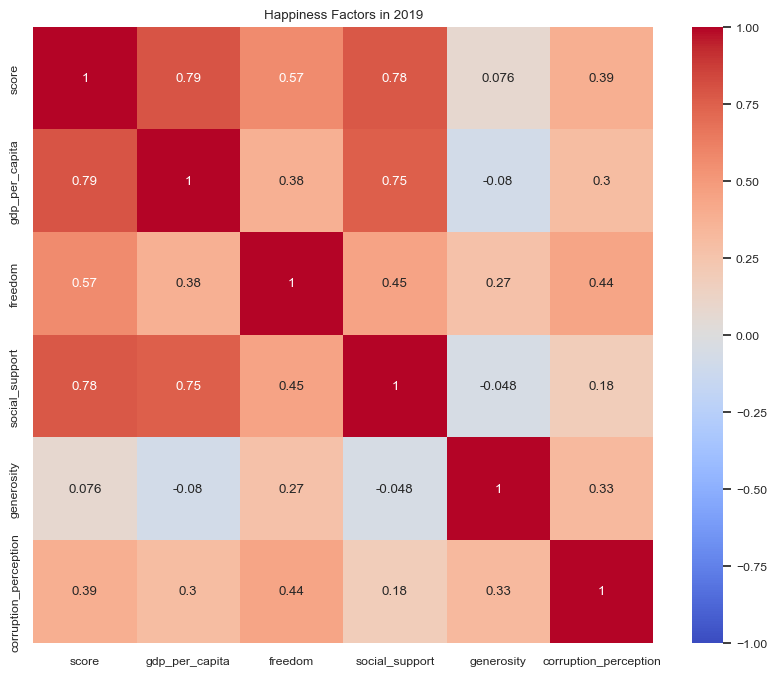

In [336]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Happiness Factors in 2019")
plt.show()

<h2> Comparing Happiness Factors, 2018 & 2019 </>

In [380]:
## FOR BOTH 2018 and 2019 

all_years_columns = ['score', 'gdp_per_capita', 'freedom', 'generosity', 'social_support', 'corruption_perception']
df_all_selected = df_copy[all_columns]
df_all_selected

,score,gdp_per_capita,freedom,social_support,generosity,corruption_perception
0,7.632,1.305,0.681,1.592,0.202,0.393
1,7.594,1.456,0.686,1.582,0.286,0.340
2,7.555,1.351,0.683,1.590,0.284,0.408
3,7.495,1.343,0.677,1.644,0.353,0.138
4,7.487,1.420,0.660,1.549,0.256,0.357
...,...,...,...,...,...,...
307,3.334,0.359,0.555,0.711,0.217,0.411
308,3.231,0.476,0.417,0.885,0.276,0.147
309,3.203,0.350,0.000,0.517,0.158,0.025
310,3.083,0.026,0.225,0.000,0.235,0.035


In [381]:
df_all_corr = df_all_selected.corr()

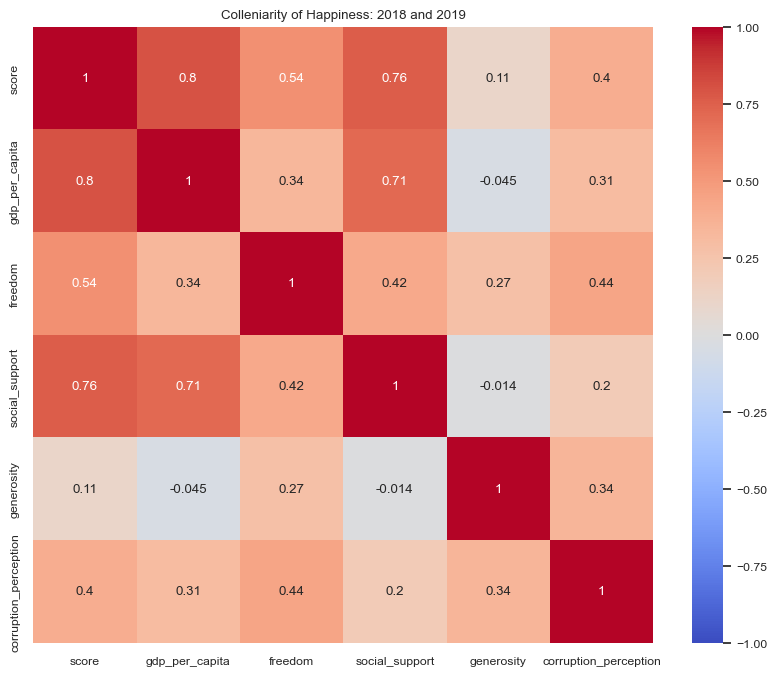

In [383]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_all_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Colleniarity of Happiness: 2018 and 2019")
plt.show()

<h2> Choropleth Map </>

In [114]:
import plotly.graph_objects as go

In [123]:
df_copy.columns

Index(['overall_rank', 'country_region', 'score', 'gdp_per_capita',
       'social_support', 'freedom', 'generosity', 'corruption_perception',
       'year'],
      dtype='object')

In [128]:
df_2019_c = df_copy[df_copy.year == 2019]

In [129]:
fig = px.choropleth(df_2019_c,
                    locations="country_region",  # Column with country names
                    locationmode="country names",  # Ensures Plotly recognizes the country names
                    color="score",  # Column with the values to map (e.g., Happiness Score)
                    #hover_name="country_region",  # Column to show on hover
                    color_continuous_scale="Plasma",  # Color scale (you can try other scales like 'Plasma' or 'Cividis')
                    title="World Happiness Report 2019 - Happiness Score")

fig.show()

<h2> Comparing Finland vs South Sudan vs Burundi </>

In [318]:
df_scorep.loc[df_scorep['country'].isin(['Finland', 'South Sudan'])] 

,country,score_2018,score_2019,score_change
45,Finland,7.632,7.769,-0.137
131,South Sudan,3.254,2.853,0.401


In [346]:
only_top_countries = df_copy.loc[df_copy['country_region'].isin(['Finland', 'South Sudan','Burundi'])]
only_top_countries

,overall_rank,country_region,score,gdp_per_capita,social_support,freedom,generosity,corruption_perception,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
153,154,South Sudan,3.254,0.337,0.608,0.112,0.224,0.106,2018
155,156,Burundi,2.905,0.091,0.627,0.065,0.149,0.076,2018
156,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019
300,145,Burundi,3.775,0.046,0.447,0.220,0.176,0.180,2019
311,156,South Sudan,2.853,0.306,0.575,0.010,0.202,0.091,2019


In [366]:
#Pivot the DataFrame to make each year a column
df_pivot_2 = only_top_countries.pivot(index='country_region', columns='year', values='score').reset_index()

# Rename the columns for clarity
df_pivot_2.columns = ['country', 'score_2018', 'score_2019']


# Calculate the score change between 2018 and 2019
#df_pivot_2['sc_change'] = df_pivot_2['score_2018'] - df_pivot_2['score_2019']

df_pivot_2

,country,score_2018,score_2019
0,Burundi,2.905,3.775
1,Finland,7.632,7.769
2,South Sudan,3.254,2.853


Score difference is more than 5

<h3> Extra notes and codes below this -- irrelevant </>

In [162]:
## Let's make a barplot on the happiest countries!

# Create a bar plot
#plt.figure(figsize=(10, 6))

#sns.barplot(top_countries, x='country_region', y='Score', hue='year', palette='crest')


# Customize the plot
#plt.title('Happiest Countries: 2018 vs 2019')
#plt.xlabel('Countries')
#plt.ylabel('Score')
#plt.xticks(rotation=100)
#plt.legend(title='year')
#plt.tight_layout()
#sns.despine()

# Show the plot
#plt.show()

In [ ]:
## happy.loc[(happy['country_region'] == 'Finland') & (happy['year'] == 2018)]


In [ ]:
## happiness_df = pd.DataFrame()
## happiness_df['country'] = happy.country_region.unique()
# score_delta = []
## for index, row in happiness_df.iterrows():
    #score_2018 = happy.loc[((happy['country_region'] == row['country']) & (happy['year'] == 2018))]['Score'].item()
    #score_2019 = happy.loc[(happy['country_region'] == row['country']) & (happy['year'] == 2019)]['Score'].item()
    #print(score_2018 - score_2019)

In [ ]:
## Bottom countries for 2018 & 2019

#least_countries = happy.groupby(['overall_rank', 'country_region', 'year'])['Score'].min().sort_values(ascending=True).head(20).reset_index()
#least_countries

In [ ]:
## Let's make a barplot on the happiest countries!

# Set the style of the plot
#sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))

# Create an array with the colors you want to use
#colors = ["#69b3a2", "#4374B3"]
##sns.set_palette(sns.color_palette(colors))

#sns.barplot(tail_countries, x='country_region', y='Score', hue='year')

# Customize the plot
#plt.title('Least Happiest Countries: 2018 vs 2019')
#plt.xlabel('Countries')
#plt.ylabel('Score')
#plt.xticks(rotation=45)
#plt.legend(title='year')
#plt.tight_layout()
#sns.despine()

# Show the plot
plt.show()

In [ ]:
## Pivot table for least happiest countries -- won't work because of the NaNs! 

##least_pivot = tail_countries.pivot_table(index=['overall_rank', 'country_region'], values='Score',columns='year').tail(20).reset_index()
##least_pivot


In [ ]:
## Top 15 happiest countries in 2018 ONLY

##year_2018_top = happy.loc[happy['year'] == 2018].groupby(['overall_rank', 'country_region'])['Score'].max().sort_values(ascending=False).head(15).reset_index()
## year_2018_top

In [ ]:
## Bottom 15 -- least happiest countries in 2018 ONLY

##year_2018_last = happy.loc[happy['year'] == 2018].groupby(['overall_rank', 'country_region'])['Score'].min().sort_values(ascending=False).tail(15).reset_index()
##year_2018_last

In [ ]:
## Top countries in 2019 ONLY

##year_2019_top = happy.loc[happy['year'] == 2019].groupby(['overall_rank', 'country_region'])['Score'].max().sort_values(ascending=False).head(15).reset_index()
##year_2019_top

In [ ]:
## Bottom countries in 2019 ONLY

##year_2019_last = happy.loc[happy['year'] == 2019].groupby(['overall_rank', 'country_region'])['Score'].min().sort_values(ascending=False).tail(15).reset_index()
##year_2019_last

What information am I getting and aiming to answer:
1. what are the happiest countries? - see above
2. what are the unhappiest countries? - see above
3. does happines correlate with GDP per capita and corruption? Hypothesis: The richer the country, the happier? The lower perceptions of corruption = unhappier?
4. can I find out which countries went up or down in ranking over the years? -- yes, only saw this for the top 10 and bottom 10! 
5. plot the difference in life expectancy? 
6. can create choropleth map to visually represent the happiness scores

The richer, the happier? Correlation 

Map countries to show which continent are people the happiest. Heatmap? Pairplot

Chloropeth map 